In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


C:\Users\jeann\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2 The Empirical Results

## 2.1 Data Collection Summary from CRSP

In [2]:
csv_file_path = r'C:\Users\thoma\OneDrive\Bureau\imperial\data_with_portfolio_illiquidity.csv'
data = pd.read_csv(csv_file_path, low_memory=False)
print(data.columns)

Index(['Unnamed: 0', 'index', 'date', 'PERMNO', 'PRC', 'VOL', 'RET', 'SHROUT',
       'portfolio_x', 'month', 'year', 'dollar_volume', 'I_i_d', 'market_cap',
       'portfolio_y', 'portfolio'],
      dtype='object')


In [3]:
data = data[["date", "PERMNO", "PRC", 'VOL', 'RET', 'SHROUT']]

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.strftime('%Y-%m')
data['year'] = data['date'].dt.strftime('%Y')

# Ensure numeric columns are of numeric type
numeric_columns = ['PRC', 'VOL', 'RET', 'SHROUT']
for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Set the 'date' column as the index
data.set_index('date', inplace=True)
# Preparing the new sample data for illiquidity measure calculation

sample_data = data[:].copy()
sample_data

,PERMNO,PRC,VOL,RET,SHROUT,month,year
date,,,,,,,
1962-07-02,10006,62.000,1700.0,0.050847,1453,1962-07,1962
1962-07-03,10006,61.125,2800.0,-0.014113,1453,1962-07,1962
1962-07-05,10006,61.000,2200.0,-0.002045,1453,1962-07,1962
1962-07-06,10006,60.500,2300.0,-0.008197,1453,1962-07,1962
1962-07-09,10006,61.000,900.0,0.008264,1453,1962-07,1962
...,...,...,...,...,...,...,...
1988-08-03,71431,11.625,400.0,-0.031250,0,1988-08,1988
1988-08-04,71431,11.500,2500.0,-0.010753,0,1988-08,1988
1988-08-05,71431,11.125,2500.0,-0.032609,0,1988-08,1988


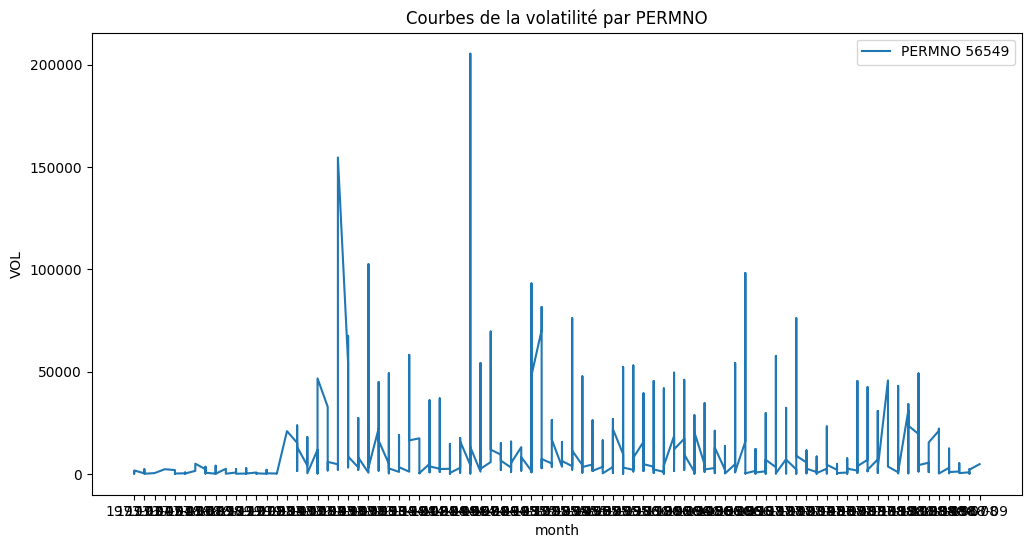

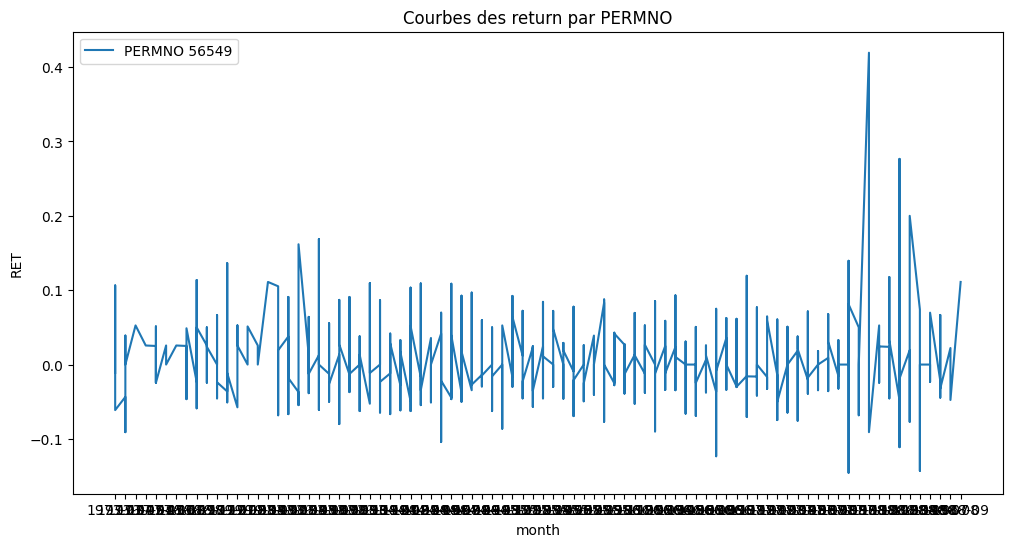

In [4]:
dataset = sample_data[sample_data['PERMNO'] == 56549]
permno_valeurs_uniques = dataset['PERMNO'].unique()

plt.figure(figsize=(12, 6))
for permno in permno_valeurs_uniques:
    subset = dataset[dataset['PERMNO'] == permno]
    plt.plot(subset['month'], subset['VOL'], label=f'PERMNO {permno}')

plt.xlabel('month')
plt.ylabel('VOL')
plt.title('Courbes de la volatilité par PERMNO')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
for permno in permno_valeurs_uniques:
    subset = dataset[dataset['PERMNO'] == permno]
    plt.plot(subset['month'], subset['RET'], label=f'PERMNO {permno}')

plt.xlabel('month')
plt.ylabel('RET')
plt.title('Courbes des return par PERMNO')
plt.legend()
plt.show()

## 2.2 The illiquidity measure

In [20]:
# Calculate the dollar volume and daily illiquidity measure
sample_data['dollar_volume'] = sample_data['PRC'] * sample_data['VOL']
sample_data['I_i_d'] = sample_data['RET'].abs() / sample_data['dollar_volume']* 1e6
sample_data

,PERMNO,PRC,VOL,RET,SHROUT,month,year,dollar_volume,I_i_d,market_cap
date,,,,,,,,,,
1962-07-02,10006,62.000,1700.0,0.050847,1453,1962-07,1962,105400.0,0.482419,90086.000
1962-07-03,10006,61.125,2800.0,-0.014113,1453,1962-07,1962,171150.0,0.082460,88814.625
1962-07-05,10006,61.000,2200.0,-0.002045,1453,1962-07,1962,134200.0,0.015238,88633.000
1962-07-06,10006,60.500,2300.0,-0.008197,1453,1962-07,1962,139150.0,0.058908,87906.500
1962-07-09,10006,61.000,900.0,0.008264,1453,1962-07,1962,54900.0,0.150528,88633.000
...,...,...,...,...,...,...,...,...,...,...
1988-08-03,71431,11.625,400.0,-0.031250,0,1988-08,1988,4650.0,6.720430,0.000
1988-08-04,71431,11.500,2500.0,-0.010753,0,1988-08,1988,28750.0,0.374017,0.000
1988-08-05,71431,11.125,2500.0,-0.032609,0,1988-08,1988,27812.5,1.172458,0.000


In [21]:
# Calculate market capitalization
sample_data['market_cap'] = sample_data['PRC'].abs() * sample_data['SHROUT']
sample_data

,PERMNO,PRC,VOL,RET,SHROUT,month,year,dollar_volume,I_i_d,market_cap
date,,,,,,,,,,
1962-07-02,10006,62.000,1700.0,0.050847,1453,1962-07,1962,105400.0,0.482419,90086.000
1962-07-03,10006,61.125,2800.0,-0.014113,1453,1962-07,1962,171150.0,0.082460,88814.625
1962-07-05,10006,61.000,2200.0,-0.002045,1453,1962-07,1962,134200.0,0.015238,88633.000
1962-07-06,10006,60.500,2300.0,-0.008197,1453,1962-07,1962,139150.0,0.058908,87906.500
1962-07-09,10006,61.000,900.0,0.008264,1453,1962-07,1962,54900.0,0.150528,88633.000
...,...,...,...,...,...,...,...,...,...,...
1988-08-03,71431,11.625,400.0,-0.031250,0,1988-08,1988,4650.0,6.720430,0.000
1988-08-04,71431,11.500,2500.0,-0.010753,0,1988-08,1988,28750.0,0.374017,0.000
1988-08-05,71431,11.125,2500.0,-0.032609,0,1988-08,1988,27812.5,1.172458,0.000


In [24]:
# Group by PERMNO and resample
grouped = sample_data.groupby('PERMNO')

# Initialize an empty DataFrame to store results
monthly_illiq = pd.DataFrame()

for name, group in grouped:
    # Resample to monthly frequency and calculate mean illiquidity and last market cap
    monthly = group.resample('M').agg({'I_i_d': 'mean', 'market_cap': 'last'})

    # Check if July 1962 data exists for this PERMNO
    if '1962-07' in monthly.index.strftime('%Y-%m'):
        base_cap = monthly.loc['1962-07', 'market_cap']
    else:
        base_cap = monthly['market_cap'].iloc[0]

    # Normalize the market cap to get P^M_{t-1} and calculate c_i_prime
    if isinstance(base_cap, pd.Series):
        base_cap = base_cap.iloc[0]
    if base_cap > 0:
        monthly['normalized_market_cap'] = monthly['market_cap'] / base_cap
    else:
        monthly['normalized_market_cap'] =  1
    monthly['c_i_prime'] = np.minimum(0.25 + 0.30 * monthly['I_i_d'] / monthly['normalized_market_cap'].shift(1), 30.00)
    
    
    # Append to the result DataFrame
    monthly['PERMNO'] = name  # Add PERMNO back as a column
    monthly_illiq = pd.concat([monthly_illiq, monthly])


In [26]:
monthly_illiq

,I_i_d,market_cap,normalized_market_cap,c_i_prime,PERMNO
date,,,,,
1962-07-31,0.260596,98077.500,1.000000,NaN,10006
1962-08-31,0.108096,97532.625,0.994444,0.282429,10006
1962-09-30,0.100998,92265.500,0.940741,0.280469,10006
1962-10-31,0.084002,98804.000,1.007407,0.276788,10006
1962-11-30,0.079943,105887.375,1.079630,0.273807,10006
...,...,...,...,...,...
1988-04-30,0.482929,0.000,1.000000,0.394879,71431
1988-05-31,0.838999,0.000,1.000000,0.501700,71431
1988-06-30,0.222340,0.000,1.000000,0.316702,71431


In [ ]:
# Create a year column for annual grouping
sample_data['year'] = sample_data.index.year
# Calculate annual illiquidity for each stock
annual_illiq = monthly_illiq.groupby(['PERMNO', 'year'])['I_i_d'].mean().reset_index()

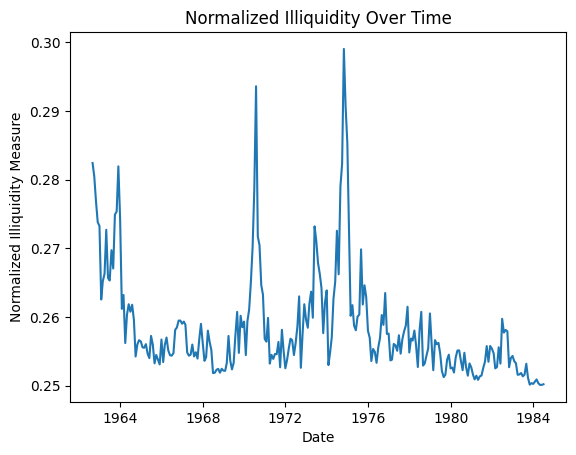

In [13]:
# Plotting the data
illiq_stock = monthly_illiq[monthly_illiq['PERMNO'] == 10006]
plt.plot(illiq_stock.index, illiq_stock["c_i_prime"])
plt.xlabel('Date')
plt.ylabel('Normalized Illiquidity Measure')
plt.title('Normalized Illiquidity Over Time')
plt.show()

## 2.3 Market and Illiquidity Portfolios

### 2.3.1 Illiquidity-Weighted Portfolios

In [ ]:
# Rank stocks by illiquidity within each year
num_portfolios = 25
annual_illiq['illiq_rank'] = annual_illiq.groupby('year')['I_i_d'].rank(method='first')

# Assign stocks to portfolios based on their rank
annual_illiq['portfolio'] = pd.qcut(annual_illiq['illiq_rank'], num_portfolios, labels=False)

# Merge the portfolio assignment back to the monthly data
monthly_illiq = monthly_illiq.reset_index().merge(
    annual_illiq[['PERMNO', 'year', 'portfolio']],
    on=['PERMNO', 'year'],
    how='left'
)
# monthly_illiq.to_csv('data_with_portfolio_illiquidity.csv')
# Now, calculate the value-weighted returns for each portfolio
# Calculate total market cap for each portfolio
portfolio_group = monthly_illiq.groupby(['date', 'portfolio'])
total_market_cap_by_portfolio = portfolio_group['market_cap'].transform('sum')

# Calculate the weight of each stock in its portfolio
monthly_illiq['weight'] = monthly_illiq['market_cap'] / total_market_cap_by_portfolio

# Calculate the value-weighted return for each stock
monthly_illiq['value_weighted_ret'] = monthly_illiq['RET'] * monthly_illiq['weight']

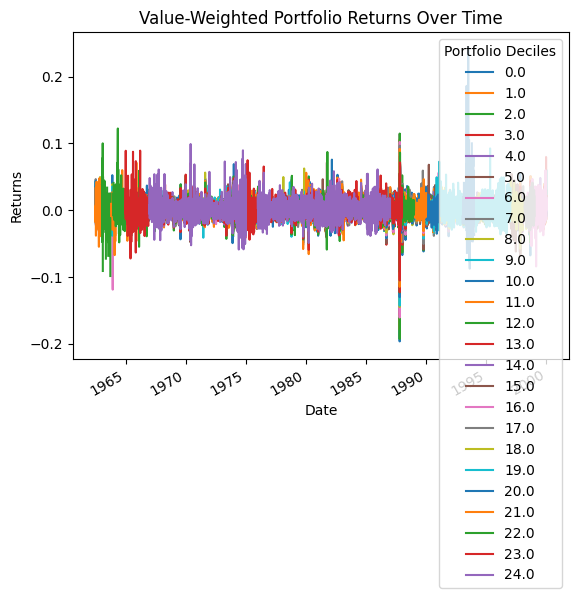

In [ ]:
# Aggregate the value-weighted returns for each portfolio
portfolio_returns = sample_data.groupby(['date', 'portfolio'])['value_weighted_ret'].sum().unstack('portfolio')

# Plot the value-weighted portfolio returns
portfolio_returns.plot(title='Value-Weighted Portfolio Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend(title='Portfolio Deciles')
plt.show()

In [ ]:
sample_data_market = sample_data[["portfolio", "PERMNO", "month", "I_i_d", "value_weighted_ret"]]
sample_data_market

,portfolio,PERMNO,month,I_i_d,value_weighted_ret
0,2.0,10006,1962-07,4.824194e-07,0.000162
1,2.0,10006,1962-07,8.245983e-08,-0.000043
2,2.0,10006,1962-07,1.523845e-08,-0.000006
3,2.0,10006,1962-07,5.890765e-08,-0.000025
4,2.0,10006,1962-07,1.505282e-07,0.000025
...,...,...,...,...,...
16995995,18.0,71431,1988-08,6.720430e-06,-0.000000
16995996,18.0,71431,1988-08,3.740174e-07,-0.000000
16995997,18.0,71431,1988-08,1.172458e-06,-0.000000
16995998,18.0,71431,1988-08,1.468758e-07,0.000000


### 2.3.2 Market and Illiquidity Portfolios

In [ ]:
# Regrouper par 'DATE' et 'portfolio' et calculer la moyenne des variables
sample_data_market = sample_data_market.groupby(['month', 'portfolio']).agg({'value_weighted_ret': 'sum', 'I_i_d': 'sum'}).reset_index()
sample_data_market

In [35]:
result

,DATE,portfolio,value_weighted_ret,ILLIQ_i_t
0,1962-07,0.0,0.075068,55.859925
1,1962-07,1.0,0.059875,136.332526
2,1962-07,2.0,0.057412,221.459771
3,1962-07,3.0,0.066073,327.716291
4,1962-07,4.0,0.052647,448.088829
...,...,...,...,...
10423,1999-12,12.0,0.066353,120.446981
10424,1999-12,13.0,0.204147,197.958069
10425,1999-12,14.0,0.064391,476.114587
10426,1999-12,15.0,0.081096,1263.360913


In [36]:
result["portfolio"].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

In [37]:
result2 = result.groupby('DATE')[['value_weighted_ret', 'ILLIQ_i_t']].sum().reset_index()
result2

,DATE,value_weighted_ret,ILLIQ_i_t
0,1962-07,1.536892,95576.043307
1,1962-08,1.090426,93288.482461
2,1962-09,-1.274697,84616.542522
3,1962-10,-0.562262,99590.060165
4,1962-11,2.901187,78454.227156
...,...,...,...
445,1999-08,-0.410733,4398.085690
446,1999-09,-0.246158,3984.621373
447,1999-10,0.427802,4718.810178
448,1999-11,0.354347,3902.426671


In [38]:
combined_result = pd.concat([result, result2], ignore_index=True)

In [39]:
combined_result

,DATE,portfolio,value_weighted_ret,ILLIQ_i_t
0,1962-07,0.0,0.075068,55.859925
1,1962-07,1.0,0.059875,136.332526
2,1962-07,2.0,0.057412,221.459771
3,1962-07,3.0,0.066073,327.716291
4,1962-07,4.0,0.052647,448.088829
...,...,...,...,...
10873,1999-08,NaN,-0.410733,4398.085690
10874,1999-09,NaN,-0.246158,3984.621373
10875,1999-10,NaN,0.427802,4718.810178
10876,1999-11,NaN,0.354347,3902.426671


In [40]:
combined_result['portfolio'].fillna('market', inplace=True)
combined_result

,DATE,portfolio,value_weighted_ret,ILLIQ_i_t
0,1962-07,0.0,0.075068,55.859925
1,1962-07,1.0,0.059875,136.332526
2,1962-07,2.0,0.057412,221.459771
3,1962-07,3.0,0.066073,327.716291
4,1962-07,4.0,0.052647,448.088829
...,...,...,...,...
10873,1999-08,market,-0.410733,4398.085690
10874,1999-09,market,-0.246158,3984.621373
10875,1999-10,market,0.427802,4718.810178
10876,1999-11,market,0.354347,3902.426671


## 2.4 Innovations in illiquidity

In [106]:
portfolio0 = combined_result[combined_result['portfolio'] == 6]
portfolio0

,DATE,portfolio,value_weighted_ret,ILLIQ_i_t
6,1962-07,6.0,0.062161,886.466185
28,1962-08,6.0,0.044222,779.654864
50,1962-09,6.0,-0.029115,634.948341
72,1962-10,6.0,-0.014583,1074.086688
94,1962-11,6.0,0.097469,575.826531
...,...,...,...,...
10349,1999-08,6.0,-0.027589,7.983906
10366,1999-09,6.0,-0.013747,8.191396
10383,1999-10,6.0,0.029001,8.957325
10400,1999-11,6.0,0.003940,8.085166


In [79]:
portfolio_market = combined_result[combined_result['portfolio'] == "market"]
portfolio_market

,DATE,portfolio,value_weighted_ret,ILLIQ_i_t
10428,1962-07,market,1.536892,95576.043307
10429,1962-08,market,1.090426,93288.482461
10430,1962-09,market,-1.274697,84616.542522
10431,1962-10,market,-0.562262,99590.060165
10432,1962-11,market,2.901187,78454.227156
...,...,...,...,...
10873,1999-08,market,-0.410733,4398.085690
10874,1999-09,market,-0.246158,3984.621373
10875,1999-10,market,0.427802,4718.810178
10876,1999-11,market,0.354347,3902.426671


In [80]:
# Reset the index of your DataFrame
portfolio_market = portfolio_market.reset_index(drop=True)

def manual_ar2_prediction(series):
    preds = [np.nan, np.nan]  # First two values can't be predicted
    resids = [np.nan, np.nan]  # Residuals for first two values

    for i in range(2, len(series)):
        # Use two previous values to predict the next one
        X = np.array([series[i-2], series[i-1]])
        y = series[i]

        # Simple linear regression: y = a*X[0] + b*X[1]
        A = np.vstack([X, np.ones(len(X))]).T
        try:
            a, b = np.linalg.lstsq(A, [series[i-2], series[i-1]], rcond=None)[0]
            pred = a * X[0] + b * X[1]
            preds.append(pred)
            resids.append(y - pred)
        except np.linalg.LinAlgError:
            # Unable to compute, append NaN
            preds.append(np.nan)
            resids.append(np.nan)

    return preds, resids

# Apply manual AR(2) prediction
portfolio_market['value_weighted_ret_pred'], portfolio_market['value_weighted_ret_resid'] = manual_ar2_prediction(portfolio_market['value_weighted_ret'])
portfolio_market['ILLIQ_i_t_pred'], portfolio_market['ILLIQ_i_t_resid'] = manual_ar2_prediction(portfolio_market['ILLIQ_i_t'])

portfolio_market

,DATE,portfolio,value_weighted_ret,ILLIQ_i_t,value_weighted_ret_pred,value_weighted_ret_resid,ILLIQ_i_t_pred,ILLIQ_i_t_resid
0,1962-07,market,1.536892,95576.043307,NaN,NaN,NaN,NaN
1,1962-08,market,1.090426,93288.482461,NaN,NaN,NaN,NaN
2,1962-09,market,-1.274697,84616.542522,1.536892,-2.811589,95576.043307,-10959.500785
3,1962-10,market,-0.562262,99590.060165,1.090426,-1.652687,93288.482443,6301.577722
4,1962-11,market,2.901187,78454.227156,-1.274697,4.175884,84616.542535,-6162.315379
...,...,...,...,...,...,...,...,...
445,1999-08,market,-0.410733,4398.085690,0.848832,-1.259565,4845.234667,-447.148977
446,1999-09,market,-0.246158,3984.621373,-0.078293,-0.167866,3897.353249,87.268124
447,1999-10,market,0.427802,4718.810178,-0.410733,0.838535,4398.085690,320.724488
448,1999-11,market,0.354347,3902.426671,-0.246158,0.600506,3984.621373,-82.194703


In [108]:
# Reset the index of your DataFrame
df5 = df5.reset_index(drop=True)

def manual_ar2_prediction(series):
    preds = [np.nan, np.nan]  # First two values can't be predicted
    resids = [np.nan, np.nan]  # Residuals for first two values

    for i in range(2, len(series)):
        # Use two previous values to predict the next one
        X = np.array([series[i-2], series[i-1]])
        y = series[i]

        # Simple linear regression: y = a*X[0] + b*X[1]
        A = np.vstack([X, np.ones(len(X))]).T
        try:
            a, b = np.linalg.lstsq(A, [series[i-2], series[i-1]], rcond=None)[0]
            pred = a * X[0] + b * X[1]
            preds.append(pred)
            resids.append(y - pred)
        except np.linalg.LinAlgError:
            # Unable to compute, append NaN
            preds.append(np.nan)
            resids.append(np.nan)

    return preds, resids

# Apply manual AR(2) prediction
df5['value_weighted_ret_pred'], df5['value_weighted_ret_resid'] = manual_ar2_prediction(df5['value_weighted_ret'])
df5['ILLIQ_i_t_pred'], df5['ILLIQ_i_t_resid'] = manual_ar2_prediction(df5['ILLIQ_i_t'])

df5

,DATE,portfolio,value_weighted_ret,ILLIQ_i_t,value_weighted_ret_pred,value_weighted_ret_resid,ILLIQ_i_t_pred,ILLIQ_i_t_resid
0,1962-07,6.0,0.062161,886.466185,NaN,NaN,NaN,NaN
1,1962-08,6.0,0.044222,779.654864,NaN,NaN,NaN,NaN
2,1962-09,6.0,-0.029115,634.948341,0.062161,-0.091276,886.466185,-251.517845
3,1962-10,6.0,-0.014583,1074.086688,0.044222,-0.058805,779.654864,294.431824
4,1962-11,6.0,0.097469,575.826531,-0.029115,0.126584,634.948341,-59.121809
...,...,...,...,...,...,...,...,...
445,1999-08,6.0,-0.027589,7.983906,0.031443,-0.059032,7.401806,0.582099
446,1999-09,6.0,-0.013747,8.191396,-0.019862,0.006116,6.888865,1.302531
447,1999-10,6.0,0.029001,8.957325,-0.027589,0.056590,7.983906,0.973419
448,1999-11,6.0,0.003940,8.085166,-0.013747,0.017686,8.191396,-0.106230


### 2.4.1 Liquidity risk

In [109]:
temp_df = pd.DataFrame({
        'r_i_t': df5['value_weighted_ret'],
        'resid_r_i_t': df5['value_weighted_ret_resid'],
        'r_i_M': portfolio_market['value_weighted_ret'],
        'resid_r_i_M': portfolio_market['value_weighted_ret_resid'],
        'c_i_t': df5['ILLIQ_i_t'],
        'resid_c_i_t': df5['ILLIQ_i_t_resid'],
        'c_i_M': portfolio_market['ILLIQ_i_t'],
        'resid_c_i_M': portfolio_market['ILLIQ_i_t_resid'],   
    })


In [110]:
temp_df

,r_i_t,resid_r_i_t,r_i_M,resid_r_i_M,c_i_t,resid_c_i_t,c_i_M,resid_c_i_M
0,0.062161,NaN,1.536892,NaN,886.466185,NaN,95576.043307,NaN
1,0.044222,NaN,1.090426,NaN,779.654864,NaN,93288.482461,NaN
2,-0.029115,-0.091276,-1.274697,-2.811589,634.948341,-251.517845,84616.542522,-10959.500785
3,-0.014583,-0.058805,-0.562262,-1.652687,1074.086688,294.431824,99590.060165,6301.577722
4,0.097469,0.126584,2.901187,4.175884,575.826531,-59.121809,78454.227156,-6162.315379
...,...,...,...,...,...,...,...,...
445,-0.027589,-0.059032,-0.410733,-1.259565,7.983906,0.582099,4398.085690,-447.148977
446,-0.013747,0.006116,-0.246158,-0.167866,8.191396,1.302531,3984.621373,87.268124
447,0.029001,0.056590,0.427802,0.838535,8.957325,0.973419,4718.810178,320.724488
448,0.003940,0.017686,0.354347,0.600506,8.085166,-0.106230,3902.426671,-82.194703


In [111]:
covariance_matrix = temp_df[['r_i_t', 'resid_r_i_t']].cov()
covariance1 = covariance_matrix.loc['r_i_t', 'resid_r_i_t']
variance1 = (temp_df["resid_r_i_M"] - temp_df["resid_c_i_M"]).var()
B_1 = covariance1 / variance1
B_1

3.790358153434616e-11

In [112]:
covariance_matrix = temp_df[['r_i_t', 'resid_c_i_M']].cov()
covariance1 = covariance_matrix.loc['r_i_t', 'resid_c_i_M']
variance1 = (temp_df["resid_r_i_M"] - temp_df["resid_c_i_M"]).var()
B_3 = covariance1 / variance1
B_3

-1.3997612488424574e-06

In [ ]:
# Compute covariance
beta_1 = temp_df.loc[['r_i_t', 'resid_r_i_M']].cov()
beta_1

### 2.4.2 How liquidity risk affects returns ?

In [3]:
data = {
    'Portfolio': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
    'β1': [2.66E-11, 3.89E-11, 4.01E-11, 4.4E-11, 5.19E-11, 5.28E-11, 5.97E-11, 6.21E-11, 7.32E-11, 8.12E-11, 9.32E-11, 9.54E-11, 9.96E-11],
    'β2': [3.21E-13, 3.63E-13, 3.98E-13, 4.12E-13, 4.32E-13, 4.76E-13, 5.21E-13, 7.21E-13, 1.032E-12, 1.189E-12, 1.232E-12, 1.321E-12, 1.489E-12],
    'β3': [-1.39E-06, -1.65E-06, -1.98E-06, -2.14E-06, -2.39E-06, -2.43E-06, -2.87E-06, -3.01E-06, -3.7E-06, -4.04E-06, -4.98E-06, -5.23E-06, -6.7E-06],
    'β4': [-2.32E-09, -2.45E-09, -2.78E-09, -2.89E-09, -3.12E-09, -3.72E-09, -4.21E-09, -4.75E-09, -4.9E-09, -5.23E-09, -6.12E-09, -6.63E-09, -6.89E-09]
}

df = pd.DataFrame(data)

df["βnet"] = df["β1"] + df["β2"] - df["β3"] - df["β4"]
print(df)

    Portfolio            β1            β2        β3            β4      βnet
0           1  2.660000e-11  3.210000e-13 -0.000001 -2.320000e-09  0.000001
1           3  3.890000e-11  3.630000e-13 -0.000002 -2.450000e-09  0.000002
2           5  4.010000e-11  3.980000e-13 -0.000002 -2.780000e-09  0.000002
3           7  4.400000e-11  4.120000e-13 -0.000002 -2.890000e-09  0.000002
4           9  5.190000e-11  4.320000e-13 -0.000002 -3.120000e-09  0.000002
5          11  5.280000e-11  4.760000e-13 -0.000002 -3.720000e-09  0.000002
6          13  5.970000e-11  5.210000e-13 -0.000003 -4.210000e-09  0.000003
7          15  6.210000e-11  7.210000e-13 -0.000003 -4.750000e-09  0.000003
8          17  7.320000e-11  1.032000e-12 -0.000004 -4.900000e-09  0.000004
9          19  8.120000e-11  1.189000e-12 -0.000004 -5.230000e-09  0.000004
10         21  9.320000e-11  1.232000e-12 -0.000005 -6.120000e-09  0.000005
11         23  9.540000e-11  1.321000e-12 -0.000005 -6.630000e-09  0.000005
12         2

In [ ]:
portfolio_market["y"] = portfolio_market["value_weighted_ret_pred"] - 0.034 * portfolio_market["ILLIQ_i_t_pred"]

### First regression

In [ ]:
beta_net_portfolio_6 = df.loc[df['Portfolio'] == 3, 'βnet'].values[0]
portfolio_market["beta_net"] =beta_net_portfolio_6 



In [ ]:
X = portfolio_market['beta_net']
X = sm.add_constant(X) 
y = portfolio_market['y']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

### Second regression

In [ ]:
X = portfolio_market[['beta_net','ILLIQ_i_t_pred']]
X = sm.add_constant(X)  # Ajout d'une colonne constante
y = portfolio_market['value_weighted_ret_pred']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

### Third regression

In [ ]:
beta1_portfolio_6 = df.loc[df['Portfolio'] == 3, 'β1'].values[0]
portfolio_market["beta_1"] =beta1_portfolio_6 

In [ ]:
X = portfolio_market[['beta_net','beta_1']]
X = sm.add_constant(X)  
y = portfolio_market['y']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

### Fourth regression

In [ ]:
X = portfolio_market[['beta_net','ILLIQ_i_t_pred','beta_1']]
X = sm.add_constant(X) 
y = portfolio_market['value_weighted_ret_pred']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


### Fifth regression

In [ ]:
X = portfolio_market[['beta_net','beta_1']]
X = sm.add_constant(X)  
y = portfolio_market['value_weighted_ret_pred']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


### Sixth regression

In [ ]:
beta2_portfolio_6 = df.loc[df['Portfolio'] == 3, 'β2'].values[0]
portfolio_market["beta_2"] =beta2_portfolio_6 

beta3_portfolio_6 = df.loc[df['Portfolio'] == 3, 'β3'].values[0]
portfolio_market["beta_3"] =beta3_portfolio_6 

beta4_portfolio_6 = df.loc[df['Portfolio'] == 3, 'β4'].values[0]
portfolio_market["beta_4"] =beta4_portfolio_6 

In [5]:
X = portfolio_market[['beta_net','beta_1','beta_2','beta_3','beta_4']]
X = sm.add_constant(X)  
y = portfolio_market['y']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


NameError: name 'portfolio_market' is not defined

### Seventh regression

In [ ]:
X = portfolio_market[['beta_net','beta_1','beta_2','beta_3','beta_4','ILLIQ_i_t_pred']]
X = sm.add_constant(X) 
y = portfolio_market['value_weighted_ret_pred']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())